# Gathering data 

- it can happen in a variety of ways
    - downloading some files 
    - get them from an API
    - scraping a website
    - we might have existing data in a database

- we also often to combine data from multiple sources and formats like 
    - CSV files
    - xlsx files
    - JSON files
    - SQL databases
    - NoSQL databases
    - APIs
    - Web scraping
    - etc

depending on the project, data we need may be spread across dozens of sources and in different formats. we will combine them all to create a master dataset, which we will then use to answer our questions.

## Objectives
- Gather real data from several different sources and file formats
- Learn about each file format and how to handle it using Python
- Combine data all to create a master dataset
- Use the combined data to answer interesting questions and produce visualizations.

- we will study how to gather data from different `sources` and for each source we will learn a `file format` as a case study

## case Study: Finding the best movie

- How do you pick which movie to watch? You may check movie rating websites like Rotten Tomatoes or IMDb to help you chose. These sites contain a number of different metrics which are used to evaluate whether or not you will like a movie. However, because these metrics do not always show on the same page, figuring out the best movies can get confusing.

- what we will do
    - We can start with the Rotten Tomatoes: Top 100 Movies of All Time. We can use a scatter plot to look at audience scores vs critics scores for each movie.
    
    ![image.png](scatterplot-of-movie-scores.png)
    - **Generate a Word Cloud**
    For lots of people, Roger Ebert's movie review was the only review they needed because he explained the movie in such a way that they would know whether they would like it or not. Wouldn't it be neat if we had a word cloud like this one for each of the movies in the top
    ![image.png](wordcloud.jpg)

### Source: using a pre-gathered data (Files on hand), File format: Flat files

- sometimes gathring can be extremely easy, sometimes we are just simply given the data.
    - accessing the file from the company's database
    - downloading the file from the internet
    - getting the file from a colleague
so we just download it or access it and move on, so this process of gathering doesn't usually require programming. 

#### case study example
- we have a tsv file (tab separated values) that contains the top 100 movies of all time according to Rotten Tomatoes., it has 4 columns
    - ranking
    - rating
    - title
    - number of reviews

- TSV file is a type of `flat file`, the term **flat file** encompasses a wide range of file formats, including CSV, TSV, and fixed-width files. Flat files are called "flat" because there is no structure to the data beyond the single, two-dimensional array of data.
    - it is a tabular data in plain text format
    - one record per line
    - each record consists of one or more fields, separated by delimiters like commas, tabs, or colons
- software like pandas or spreadsheet applications like google sheets can easily read and write flat files.
- some of the most common flat file formats are
    - CSV (comma-separated values)
    - TSV (tab-separated values)
    - .txt files can also be flat files (if they are structured in a tabular, one-record-per-line with delimiters)
        - but not all txt files are flat files
- in contrast, Excel files are not flat files
    - Excel has its data in a zip collection of XML files
    - once we unzip the file, we can see the XML files, it is human readable but not as easy to read as a flat file


- advantages of flat files 
    - flat files are human-readable
    - lightweight
    - software can easily read and write them
    - great for small datasets
- disadvantages
    - there is no standard
        - we have a variety of delimiters
    - lack of integrity
    - sometimes we have massive data redundancy

To get a better understanding of when to choose a flat file, see "When does small become large?" [in Cornell: Relational Databases - Not your Father's Flat Files](https://www.cac.cornell.edu/education/Training/DataAnalysis/RelationalDatabases.pdf)

- since it is simple, we can programatically parse the file and put the information in a structure of our choice using base python or any other programming language
    - open the file 
    - read the file line by line
    - separate each line's content by the delimiter
    - put the content in a data structure
- we can use libraries like `pandas` to read the file and put it in a dataframe
    - pandas's `read_csv` function can read and handle all types of flat files
        - we just need to change the parameters to suit our file
        - like `sep` parameter to specify the delimiter
        - `header` parameter to specify if the file has a header or not
        - `quotechar` parameter to specify what character is used to quote fields
    - it also provide a ton of functionality to manipulate the data 

In [5]:
import pandas as pd

df = pd.read_csv("bestofrt.tsv", sep="\t")
df.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


## Source: Web scraping, File format: HTML

Web scraping is a fancy way of saying "extracting data from websites using code". 

- the data that lives on webpages is called HTML (HyperText Markup Language)
    - it is made of things called `tags` which are used to structure the content of the page
- because HTML is just text, we can parse these tags and the content withen them either 
    - manually 
    - programmatically

- we can download HTML and access it offline, or we can do it in real time over the internet

- web page's HTML is known to change over time. Scraping code can break easily when web redesigns occur, which makes scraping brittle and not recommended for projects with longevity

### Step1: Getting the webpages themselves

- we can get the HTML of the pages we need using 3 steps 

#### downloading it manually 
- opening it in a browser, right-clicking and selecting "save as" to save the HTML file to our computer
- this is not practical for large number of pages
- for data analysis, we do it programmatically, which is better for scalability and reproducibility

#### Downloading it programmatically 

- we can use python's `requests` library to download the HTML of a webpage

In [8]:
import requests

url = "https://www.rottentomatoes.com/m/interstellar_2014"
response = requests.get(url)
response

<Response [200]>

In [19]:
# Save the HTML to file
with open("Interstellar.html", mode = "w") as file:
    file.write(response.text)

- this is the code to download one file, but to download multiple files, we can use a loop to iterate over a list of URLs

#### accessing the HTML in real time (programmatically)

- the second programmatic way to access the HTML data, is done by not saving the HTML to our computer, but simply working with the response content live in the computer's memory
- we can use `beautifulsoup`'s HTML parser to work with the response content directly 

In [16]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content)
soup

<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="fb: http://www.facebook.com/2008/fbml og: http://opengraphprotocol.org/schema/" xmlns="http://www.w3.org/1999/xhtml">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<script charset="UTF-8" crossorigin="anonymous" data-domain-script="7e979733-6841-4fce-9182-515fac69187f" integrity="sha384-TKdmlzVmoD70HzftTw4WtOzIBL5mNx8mXSRzEvwrWjpIJ7FZ/EuX758yMDWXtRUN" src="https://cdn.cookielaw.org/consent/7e979733-6841-4fce-9182-515fac69187f/otSDKStub.js" type="text/javascript">
</script>
<script type="text/javascript">
                function OptanonWrapper() { }
            </script>
<script ccpa-opt-out-geo="US" ccpa-opt-out-ids="USP" ccpa-opt-out-lspa="false" charset="UTF-8" src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js" type="text/javascript">
</script>
<script src="/assets/pizza-pie/javascripts/bundles/roma/rt-common.js?single"></script>
<meta content="text/html; charset=utf-8" http-equiv=

### Step2: Parsing the HTML

since HTML is just text, we can parse it using a variety of tools

- we can parse them using our own code in basic python
    - we can use all instances of the `<span>` tag in the text using something like python's `str.find()` method or a fancier tool called `regular expressions` to search for and extract patterns in text
- but once again, we can use libraries like `beautifulsoup` that does the same thing under the hood, but we use it in a more user-friendly way

In [23]:
# make the soup
with open("rt_html\et_the_extraterrestrial.html") as file:
    soup = BeautifulSoup(file)

- make the soup means passing the path to the HTML file to a file handle, then passing the file handle to the `beautifulsoup` constructor to create a soup object

In [25]:
soup

<!DOCTYPE html>

<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<script src="//cdn.optimizely.com/js/594670329.js"></script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc" name="google-site-verification">
<meta content="034F16304017CA7DCF45D43850915323" name="msvalidate.01"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/iphone/apple-touch-icon.png" rel="apple-touch-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/styles/css/rt_main.css" rel="stylesheet"/>
<script id="jsonLdSchema" type="application/ld+json">{"@context":"http

- if we look at the soup object, it looks exactly like the HTML file, but it is now a python object that we can use methods in the `beautifulsoup` library to easily find and extract the data we need

- one of the most popular methods is the `find` method, which finds the first instance of a tag in the HTML
    - we can use it when we know there is only one instance of the tag we are looking for, so it is more efficient than the `find_all` method which scans the entire HTML file

In [28]:
# let's get the <title> tag, which is the tag that holds the title of the webpage
soup.find('title'), type(soup.find('title'))

(<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>,
 bs4.element.Tag)

- the result is a `tag` object, which is a subclass of `beautifulsoup` object, to access the content of the tag, we can use the
    - `tag.contents` attribute, which returns a list of the tag's children of type `navigablestring` or `tag`
    - `tag.text` attribute, which returns the text of the tag and its children as a single string

In [39]:
soup.find('title').contents[0], type(soup.find('title').contents[0])

('E.T. The Extra-Terrestrial\xa0(1982) - Rotten Tomatoes',
 bs4.element.NavigableString)

- we have only 1 content in the tag which is a navigablestring

In [38]:
soup.find('title').contents[0][:-len(" - Rotten Tomatoes")]

'E.T. The Extra-Terrestrial\xa0(1982)'

- the above code slices the string from the first character up to the 18th character from the end, which is the length " - Rotten Tomatoes"
- `\xa0` is unicode for a non-breaking space, which is a character that looks like a space but is not treated as one by the computer (so it is a space just for humans sight but not for the computer)

#### case study example: Scraping the audience score
- we will scrap the files from the Rotten Tomatoes website to get
    - the title of the movie (we will use it to merge later in the master dataset)
    - the audience score
    - the number of audience ratings

- Tip: to find a tag with a specific class, we can use the `find` method with the `class_` parameter
- to find a tag with multiple classes, we can use the `find` method with the `class_` parameter and pass a list of the classes
- we can use `find` and `find_all` cascadingly to find the tag we need

In [77]:
soup.find("title").contents[0][0:-len(" - Rotten Tomatoes")]

'E.T. The Extra-Terrestrial\xa0(1982)'

In [170]:
soup.find("div",class_ = "meter-value").find("span").contents[0][:-1]

'92'

In [161]:
soup.find('div', class_="col-sm-8 col-xs-12 audience-panel").findAll('div')[-1].contents[-1].split()[0].replace(",","")

'103672'

In [171]:
import os
audience_data = []

for file_name in os.listdir("rt_html"):
    # create a file handler
    with open(f"rt_html/{file_name}") as file:
        # create a soup
        soup = BeautifulSoup(file)
        element = {}
        # get the title
        element["title"] = soup.find("title").contents[0][0:-len(" - Rotten Tomatoes")]
        # get the audience score
        element["audience_score"] = int(soup.find("div",class_ = "meter-value").find("span").contents[0][:-1])
        # get the number of audience ratingts
        element["number_of_audience_ratings"] = int(soup.find('div', class_="col-sm-8 col-xs-12 audience-panel").findAll('div')[-1].contents[-1].split()[0].replace(",",""))
        audience_data.append(element)

In [172]:
audience_df = pd.DataFrame(audience_data)

In [173]:
audience_df.head()

,title,audience_score,number_of_audience_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,103672
1,The 39 Steps (1935),86,23647
2,The Adventures of Robin Hood (1938),89,33584
3,All About Eve (1950),94,44564
4,All Quiet on the Western Front (1930),89,17768


In [168]:
audience_df.to_csv("audience_scores.csv", index=False)

## Goal 1: Critic score vs Audience score

- now we gathered data from 2 different sources (existing file and web scraping), we can combine them and use them 

In [1]:
import pandas as pd
critic_scores = pd.read_csv("bestofrt.tsv", sep="\t")
critic_scores.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


In [2]:
audience_data = pd.read_csv("audience_scores.csv")
audience_data.head()

,title,audience_score,number_of_audience_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,103672
1,The 39 Steps (1935),86,23647
2,The Adventures of Robin Hood (1938),89,33584
3,All About Eve (1950),94,44564
4,All Quiet on the Western Front (1930),89,17768


In [3]:
# assessment and cleaning if necessary
critic_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ranking                   100 non-null    int64 
 1   critic_score              100 non-null    int64 
 2   title                     100 non-null    object
 3   number_of_critic_ratings  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [4]:
audience_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       100 non-null    object
 1   audience_score              100 non-null    int64 
 2   number_of_audience_ratings  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [5]:
audience_data.iloc[0]["title"]

'12 Angry Men (Twelve Angry Men)\xa0(1957)'

In [6]:
critic_scores.iloc[0]["title"]

'The Wizard of Oz (1939)'

- in order to match on the titles, we need to remove the non-breaking space from audience score titles

In [7]:
audience_data["title"] = audience_data["title"].map(lambda x: x.replace("\xa0"," "))

let us join them together based on the movie title

In [89]:
master_df = critic_scores.set_index("title").join(audience_data.set_index("title"))

In [90]:
master_df.reset_index(inplace=True)

In [91]:
master_df.head()

,title,ranking,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,The Wizard of Oz (1939),1,99,110,89,874425
1,Citizen Kane (1941),2,100,75,90,157274
2,The Third Man (1949),3,100,77,93,53081
3,Get Out (2017),4,99,282,87,63837
4,Mad Max: Fury Road (2015),5,97,370,86,123937


In [92]:
master_df.to_csv("master_df.csv",index=False)

In [116]:
critic_scores.iloc[0]

ranking                                           1
critic_score                                     99
title                       The Wizard of Oz (1939)
number_of_critic_ratings                        110
Name: 0, dtype: object

In [38]:
# sanity check 
audience_data.set_index("title").loc["The Wizard of Oz (1939)"]

audience_score                    89
number_of_audience_ratings    874425
Name: The Wizard of Oz (1939), dtype: int64

In [12]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       100 non-null    object
 1   ranking                     100 non-null    int64 
 2   critic_score                100 non-null    int64 
 3   number_of_critic_ratings    100 non-null    int64 
 4   audience_score              100 non-null    int64 
 5   number_of_audience_ratings  100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


- let us plot them now 

<Axes: xlabel='audience_score', ylabel='critic_score'>

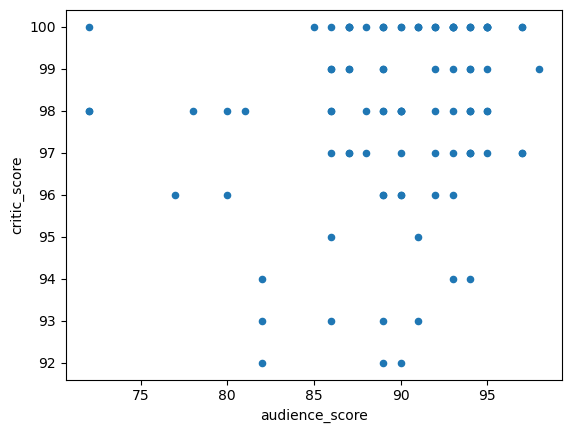

In [13]:
master_df.plot(kind="scatter", x="audience_score",y="critic_score")

- this is a pretty basic scatter plot, but this is something where `Tableau` or `PowerBI` really shines
- here is what it looks like in [`Tableau`](https://public.tableau.com/app/profile/david.venturi/viz/BestofRottenTomatoesCriticvs_AudienceScores/BestofRottenTomatoesCriticvs_AudienceScores)
    - we got audience score on the x-axis ranging from 70% to 100%
    - we got critic score on the y-axis ranging from 91% to 101% (for visual purposes)
    - two lines for the median of the audience score and the median of the critic score
        - we use them to divide the scatter plot into 4 quadrants, above it is good (because it is on the upper half), below it is bad (because it is on the lower half)
    - we even managed to convery the information of the number of reviews 
        - the number of critic reviews is denoted by the size of the circle
        - the number of audience reviews is denoted by the color of the circle

## Source: Downloading files from the internet, File format of the case study: Text files
- we can download the files manually but that is not what we will do or learn and it is not practical for reproducibility and scalability
    - instead, programmatically, we can execute the same lines of code anytime to download the files 
- we only need to know one thing to download files, which is python's `requests` library
    - knowledge of `HTTP` (hypertext Transfer Protocol) will help us understand what is going on underneath the hood

### HTTP
HTTP, the Hypertext Transfer Protocol, is the language that web browsers (like Chrome or Safari) and web servers (basically computers where the contents of a website are stored) use to speak to each other. Every time you open a webpage, or download a file, or watch a video, it's HTTP that makes it possible.

HTTP is a request/response protocol:

Your computer, a.k.a. the client, sends a request to a server for some file. For this lesson: "Get me the file **1-the-wizard-of-oz-1939-film.txt***"*, for example. `GET` is the name of the HTTP request method (of which there are multiple) used for retrieving data.
The web server sends back a response. If the request is valid: "Here is the file you asked for:", then followed by the contents of the 1-the-wizard-of-oz-1939-film.txt file itself.


In [18]:
import requests
import os

In [19]:
folder_name = "ebert_reviews"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt"
# make a request to the file using GET request and save the response
response = requests.get(url)
response

<Response [200]>

- `response [200]` is the HTTP status for "OK". It means the request was successful, and the server is sending back the data we asked for.
- we can't see the file currently, but all the data is in the `response` object with the `content` attribute

In [6]:
response.content, type(response.content)

(b'The Godfather, Part II (1974)\nhttp://www.rogerebert.com/reviews/great-movie-the-godfather-part-ii-1974\nThe musical score plays an even greater role in \xe2\x80\x9cThe Godfather: Part II\xe2\x80\x9d than it did in the original film. Nostalgic, mournful, evoking lost eras, it stirs emotions we shouldn\xe2\x80\x99t really feel for this story, and wouldn\xe2\x80\x99t, if the score were more conventional for a crime movie. Why should we regret the passing of a regime built on murder, extortion, bribery, theft and the ruthless will of frightened men? Observe how powerfully Nino Rota\xe2\x80\x99s music sways our feelings for the brutal events onscreen.\n\nAt the end of Francis Ford Coppola\xe2\x80\x99s masterwork \xe2\x80\x9cThe Godfather\xe2\x80\x9d (1972), we have seen Michael Corleone (Al Pacino) change from a young man who wanted to stand apart from his family to one who did not hesitate to take up the reigns of control. In \xe2\x80\x9cPart II\xe2\x80\x9d (1974), we see him lose his 

- it is in bytes format
- we can save the content to our compute using basic file i/o
    - we will open a file in `wb` mode (write binary) and write the content to it, and we used `wb` mode because the content is in bytes format
    - when we open these files later either manually or in pandas, the bytes will be rendered as text

In [10]:
with open("the_godfather.txt", "wb") as file:
    file.write(response.content)

### Case study example: Downloading the Roger Ebert text files review for the best 100 movies

In [14]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [15]:
ebert_review_urls[0].split(sep="/")[-1]

'1-the-wizard-of-oz-1939-film.txt'

In [20]:
folder_name

'ebert_reviews'

In [21]:
for url in ebert_review_urls:
    response = requests.get(url)
    with open(os.path.join(folder_name,url.split(sep="/")[-1]), "wb") as file:
        file.write(response.content)

In [22]:
len(os.listdir(folder_name))

88

More Information
A text file is downloaded in this example. Binary files (images, for example) are best read and wrote to [other ways](https://docs.python-requests.org/en/latest/user/quickstart/#binary-response-content).

### text file structure 
- a text file refers to a file that uses specific character set and contains no formatting 
    - it also has no media data, like images or videos
- lines of text are separated by newline characters `\n`
- flat files that we have seen earlier are text files, but not all text files are flat files (a more specific type of text file)
- regarding the specific character set, we have `ASCII` and `Unicode`

### character sets and encodings

Have you ever opened a document and seen garbled characters? That happens when your text editor, browser, or word processor is assuming the wrong encoding. You simply need to select the right encoding to display the document properly.

Character sets and encodings are two things that every programmer needs to be aware of when working with any text data

Character sets are the collections of characters that are available for use in a system.
Encoding is the scheme for converting the character sets bits to letters and numbers.
Read the articles below to learn more.
- [The Absolute Minimum Every Software Developer Absolutely, Positively Must Know About Unicode and Character Sets (No Excuses!)](https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/)
- [What Every Programmer Absolutely, Positively Needs To Know About Encodings And Character Sets To Work With Text](https://kunststube.net/encoding/)

### Text files in python
- it means opeing and reading from files, and storing the text data in pandas dataframe
- notice that for every source we learn 2 things
1. how to obtain data from the source in some file format (depending on our case study)
2. how to deal with the file format and learn more about it

- let's iterate on the text files that we obtain using `downloading` and learn how to handle them in python

In [23]:
import glob

- `glob` library is similar to `os` library, but it allows the usage of unix style pathname pattern expansion, it means we can use wildcards to match files according to some patterns
    - `*` matches everything
    - `?` matches any single character
    - `[seq]` matches any character in seq
    - `[!seq]` matches any character not in seq

In [24]:
for file_path in glob.glob(f'{folder_name}/*.txt'):
    print(file_path)

ebert_reviews\1-the-wizard-of-oz-1939-film.txt
ebert_reviews\10-metropolis-1927-film.txt
ebert_reviews\100-battleship-potemkin.txt
ebert_reviews\11-e.t.-the-extra-terrestrial.txt
ebert_reviews\12-modern-times-film.txt
ebert_reviews\14-singin-in-the-rain.txt
ebert_reviews\15-boyhood-film.txt
ebert_reviews\16-casablanca-film.txt
ebert_reviews\17-moonlight-2016-film.txt
ebert_reviews\18-psycho-1960-film.txt
ebert_reviews\19-laura-1944-film.txt
ebert_reviews\2-citizen-kane.txt
ebert_reviews\20-nosferatu.txt
ebert_reviews\21-snow-white-and-the-seven-dwarfs-1937-film.txt
ebert_reviews\22-a-hard-day27s-night-film.txt
ebert_reviews\23-la-grande-illusion.txt
ebert_reviews\25-the-battle-of-algiers.txt
ebert_reviews\26-dunkirk-2017-film.txt
ebert_reviews\27-the-maltese-falcon-1941-film.txt
ebert_reviews\29-12-years-a-slave-film.txt
ebert_reviews\3-the-third-man.txt
ebert_reviews\30-gravity-2013-film.txt
ebert_reviews\31-sunset-boulevard-film.txt
ebert_reviews\32-king-kong-1933-film.txt
ebert_revi

- in the above code we take every file with every characters but must end with `.txt` and put it in a list

In [25]:
movies_reviews = []
for file_path in glob.glob(f'{folder_name}/*.txt'):
    with open(file_path, encoding="UTF-8") as file:
        movie = {}
        # the first line is the movie title 
        movie["title"] = file.readline()[:-1] # get rid of \n in the end
        # the second line is the url 
        movie["review_url"] = file.readline()[:-1]
        # the rest of the text file is the review text
        movie["review_text"] = file.read()
        movies_reviews.append(movie)

- we have been opening files to write to them, this is the first time we open a file to read from it
    - in this case, when opening text to read, we should always open it with explicit encoding that we specify in the `encoding` parameter
    - the actual encoding depends on the source of the text file, but `utf-8` is the most common encoding
    - if we download the file from the internet, we can check the encoding by looking at the `response` object's `encoding` attribute
- after opening the file in read mode, we can read the file using several ways
    - `file.read()` reads the entire file as a single string
    - `file.readline()` reads the next line of the file
        - since text files are separated by newline characters, and since the file handler object is an iterator, we can call file.readline() several times or in a loop to read the entire file line by line
- notice that the `file` when reads some amount of text, it always points to the remaining text that is about to be read, so if we call `file.read()` again, it will read the remaining text
- then we append dictionaries to the list, and then we put the list in a dataframe, and this is the **most efficient way to create a dataframe** in pandas
    - the elements of the lists will be the rows, the keys of the dictionaries' elements will be the columns
    

In [26]:
response.encoding

'utf-8'

In [27]:
import pandas as pd
reviews_df = pd.DataFrame(movies_reviews)
reviews_df.head()

,title,review_url,review_text
0,The Wizard of Oz (1939),http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...
1,Metropolis (1927),http://www.rogerebert.com/reviews/great-movie-...,The opening shots of the restored “Metropolis”...
2,Battleship Potemkin (1925),http://www.rogerebert.com/reviews/great-movie-...,"""The Battleship Potemkin” has been so famous f..."
3,E.T. The Extra-Terrestrial (1982),http://www.rogerebert.com/reviews/great-movie-...,Dear Raven and Emil:\n\nSunday we sat on the b...
4,Modern Times (1936),http://www.rogerebert.com/reviews/modern-times...,"A lot of movies are said to be timeless, but s..."


In [93]:
# merge with the master dataframe
master_df = pd.read_csv("master_df.csv")
master_df.head()

,title,ranking,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,The Wizard of Oz (1939),1,99,110,89,874425
1,Citizen Kane (1941),2,100,75,90,157274
2,The Third Man (1949),3,100,77,93,53081
3,Get Out (2017),4,99,282,87,63837
4,Mad Max: Fury Road (2015),5,97,370,86,123937


In [94]:
master_df = master_df.set_index("title").join(reviews_df.set_index("title")).reset_index()

In [95]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       100 non-null    object
 1   ranking                     100 non-null    int64 
 2   critic_score                100 non-null    int64 
 3   number_of_critic_ratings    100 non-null    int64 
 4   audience_score              100 non-null    int64 
 5   number_of_audience_ratings  100 non-null    int64 
 6   review_url                  88 non-null     object
 7   review_text                 88 non-null     object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [96]:
master_df.to_csv("master_df.csv",index=False)

## Source: APIs, case study File format: JSON
- APIs (Application Programming Interfaces) are a way for different pieces of software to talk to one another. They are used to access data or services from another company's application, like when you see a "Log in with Facebook" button on a website, or when you use a weather app on your phone to get the forecast.
- APIs let us access data from the internet in a reasonably easy manner
    - Twitter, Facebook, and Google Maps all have APIs
    - there are also tons of opensource APIs that we can use to get data or services
- we will use an open souce API called media wiki, which is used to get data from wikipedia
    - we will use it to get the posters of the movies

- when given a choice, the rule of thumb is to use an API over web scraping
    - APIs are more stable and less likely to change, scraping on the other hand, is brittle and breaks with web layout redesigns
- APIs and their access libraries (which are libraries that help us access APIs) allow programmers to access data in a super simple manner 
    - the difference between the API and the access library is that the API is the actual service that we are accessing, and the access library is the code that we use to access the API
        - what the access library does underneath the hood, is that it sends an HTTP request to the API, and then it gets the response and parses it in a way that is easy for us to use
    - for example media wiki is the API that hosts wikipedia data (this is the service), and the `wptools` library is the access library that we use to access the media wiki API

In [84]:
# wptools access library
import wptools
page = wptools.page('Mahatma_Gandhi')

In [51]:
type(page)

wptools.page.WPToolsPage

- now that we have the response in `wptools` object, we can use the `get` method
    - Simply calling get() on a page will automagically fetch extracts, images, infobox data, wikidata, and other metadata via the MediaWiki, Wikidata, and RESTBase APIs.

In [52]:
page.get() 

en.wikipedia.org (query) Mahatma_Gandhi
en.wikipedia.org (query) Mahatma Gandhi (&plcontinue=19379|0|Diana_Eck)
en.wikipedia.org (query) Mahatma Gandhi (&plcontinue=19379|0|Jeff...
en.wikipedia.org (query) Mahatma Gandhi (&plcontinue=19379|0|Ovo_...
en.wikipedia.org (query) Mahatma Gandhi (&plcontinue=19379|0|T._S...
en.wikipedia.org (parse) 19379
www.wikidata.org (wikidata) Q1001
www.wikidata.org (labels) P3544|P1017|P1842|Q3242115|P6764|P2949|...
www.wikidata.org (labels) P10780|P2605|P9179|Q100148173|Q250165|P...
www.wikidata.org (labels) P6698|Q10225|Q18814623|P5731|P8980|P884...
www.wikidata.org (labels) P9885|P268|P989|P1015|P8750|P3788|Q1638...
www.wikidata.org (labels) P6984|P1449|P1417|Q117322976|P5019|P632...
www.wikidata.org (labels) P990|P19|P11194|P18|P270|P737|P8408|Q19...
www.wikidata.org (labels) P1411|P1728|P11249|Q11735530|Q35637|P77...
www.wikidata.org (labels) P12098|P569|P7305|Q17244894|P1819|P69|P...
en.wikipedia.org (restbase) /page/summary/Mahatma_Gandhi
en.wiki

- now page has attributes with the fetched information from the API

In [78]:
page.data.keys()

dict_keys(['requests', 'WARNINGS', 'random', 'redirected', 'pageid', 'assessments', 'extract', 'extext', 'url', 'url_raw', 'length', 'links', 'modified', 'wikibase', 'wikidata_url', 'redirects', 'aliases', 'description', 'label', 'title', 'watchers', 'image', 'iwlinks', 'wikitext', 'parsetree', 'infobox', 'labels', 'wikidata', 'wikidata_pageid', 'claims', 'what', 'exrest', 'exhtml'])

### JSON Files
- most data from APIs comes in JSON or XML formats
- both of them have their use cases
- they are very common with semi-structured data
    - semi-structured data is data that does not conform to the structure of a traditional row-column table (therefore we can't represent them in tabular format), but it contains tags or other markers to separate semantic elements and enforce hierarchies of records and fields within the data
    - that is because the nature of the semi-structured data is that it is not always consistent, some files might have some fields and others might not, and some fields might have some values in different forms, sometimes fields have sub-fields 
- so forcing the semi-structured data in tables would be wierd, that is why we use JSON
    - it is used to store and access complicated hierarichal data

### JSON files' structures
- Json is built on 2 key structures
    - `JSON objects`: a collection of key-value pairs, where the key is always a string and the value can be any type of data (including JSON objects or JSON arrays -hence the hierarchy-), surrounded by curly braces {}, and the key-value pairs are separated by commas
        - this is `similar to a python dictionary`, in fact JSON objects are interpreted as dictionaries in python
        - in other languages than python, it is analogous to data structures like hash tables, associative arrays, structs
    - `JSON arrays`: an ordered list of values, surrounded by square brackets [], and the values are separated by commas
        - `this is similar to a python list`
        - in other languages than python, it is analogous to data structures like vectors, or arrays
- the json file itself is a JSON object, and the values of the keys can be JSON objects or JSON arrays
    - this is called nesting

In [82]:
# page.data is a JSON, we can access any element in the JSON object
page.data["what"]

'human'

In [85]:
page.data.get("what")

'human'

In [83]:
page.data["requests"]

['query',
 'query',
 'query',
 'query',
 'query',
 'parse',
 'wikidata',
 'labels',
 'labels',
 'labels',
 'labels',
 'labels',
 'labels',
 'labels',
 'labels',
 'restbase',
 'imageinfo']

- notice that the value for requests is a json array

In [86]:
page.data["requests"][0]

'query'

### reading and writing JSON files
- it is not always the case that we source JSON from an API, we might have it in a file (source1)
- we can use the `JSON` library to read and write JSON files
    - `json.load()` reads a JSON file and returns a dictionary
    - `json.loads()` reads a JSON string and returns a dictionary
    - `json.dump()` writes a dictionary to a JSON file
    - `json.dumps()` writes a dictionary to a JSON string

In [87]:
import json
with open("Ghandi.json", "w") as file:
    json.dump(page.data, file)

In [91]:
with open("Ghandi.json") as file:
    data = json.load(file)
data

{'requests': ['query',
  'query',
  'query',
  'query',
  'query',
  'parse',
  'wikidata',
  'labels',
  'labels',
  'labels',
  'labels',
  'labels',
  'labels',
  'labels',
  'labels',
  'restbase',
  'imageinfo'],
 'WARNINGS': {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Special:MyLanguage/Extension:TextExtracts#Caveats.'}},
 'random': 'Werner Kümmel',
 'redirected': None,
 'pageid': 19379,
 'assessments': {'Biography': {'class': 'GA', 'importance': ''},
  'Politics': {'class': 'GA', 'importance': 'Top'},
  'Alternative Views': {'class': 'GA', 'importance': 'High'},
  'South Africa': {'class': 'GA', 'importance': 'High'},
  'India': {'class': 'GA', 'importance': 'Top'},
  'Philosophy': {'class': 'GA', 'importance': 'Mid'},
  'Socialism': {'class': 'GA', 'importance': 'High'},
  'Pakistan': {'class': 'GA', 'importance': 'Mid'},
  'Religion': {'class': '

#### Test case example: Downloading the movie posters using the media wiki API

#### Downloading Images Files 

Downloading images may seem tricky from a reading and writing perspective, in comparison to text files which you can read line by line, for example. But in reality, image files aren't special—they're just binary files. To interact with them, you don't need special software (like Photoshop or something) that "understands" images. You can use regular file opening, reading, and writing techniques, like this:

```python
import requests
r = requests.get(url)
with open(folder_name + '/' + filename, 'wb') as f:
        f.write(r.content)
```

But this technique can be error-prone. It will work most of the time, but sometimes the file you write to will be damaged

This type of error is why the requests library maintainers recommend(opens in a new tab) using the PIL(opens in a new tab) library (short for Pillow) and BytesIO from the io library for non-text requests, like images. They recommend that you access the response body as bytes, for non-text requests. For example, to create an image from binary data returned by a request:

```python
import requests
from PIL import Image
from io import BytesIO
r = requests.get(url)
i = Image.open(BytesIO(r.content))
```

In [45]:
import requests
from io import BytesIO
from PIL import Image
import os
import wptools

title_list = [
 'The_Wizard_of_Oz_(1939_film)',
 'Citizen_Kane',
 "The_Third_Man",
 'Get_Out_(film)',
 'Mad_Max:_Fury_Road',
 "The_Cabinet_of_Dr._Caligari",
 "All_About_Eve",
 'Inside_Out_(2015_film)',
 'The_Godfather',
 'Metropolis_(1927_film)',
 'E.T._the_Extra-Terrestrial',
 "Modern_Times_(film)",
 "It_Happened_One_Night",
 "Singin%27_in_the_Rain",
 "Boyhood_(2014_film)",
 'Casablanca_(film)',
 'Moonlight_(2016_film)',
 "Psycho_%281960_film%29",
 "Laura_(1944_film)",
 'Nosferatu',
 'Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 "A_Hard_Day%27s_Night_(film)",
 "La_Grande_Illusion",
 "North_by_Northwest",
 'The_Battle_of_Algiers',
 'Dunkirk_(2017_film)',
 "The_Maltese_Falcon_(1941_film)",
 'Repulsion_(film)',
 '12_Years_a_Slave_(film)',
 'Gravity_(2013_film)',
 "Sunset_Boulevard_(film)",
 'King_Kong_(1933_film)',
 'Spotlight_(film)',
 "The_Adventures_of_Robin_Hood",
 "Rashomon",
 'Rear_Window',
 'Selma_(film)',
 'Taxi_Driver',
 'Toy_Story_3',
 'Argo_(2012_film)',
 'Toy_Story_2',
 'The_Big_Sick',
 "Bride_of_Frankenstein",
 'Zootopia',
 'M_(1931_film)',
 'Wonder_Woman_(2017_film)',
 "The_Philadelphia_Story_(film)",
 "Alien_(film)",
 "Bicycle_Thieves",
 "Seven_Samurai",
 "The_Treasure_of_the_Sierra_Madre_(film)",
 "Up_(2009_film)",
 '12_Angry_Men_(1957_film)',
 'The_400_Blows',
 'Logan_(film)',
 'All_Quiet_on_the_Western_Front_(1930_film)',
 "Army_of_Shadows",
 'Arrival_(film)',
 'Baby_Driver',
 "A_Streetcar_Named_Desire",
 "The_Night_of_the_Hunter_(film)",
 'Star_Wars:_The_Force_Awakens',
 'Manchester_by_the_Sea_(film)',
 'Dr._Strangelove',
 "Frankenstein_(1931_film)",
 "Vertigo_(film)",
 'The_Dark_Knight_(film)',
 "Touch_of_Evil",
 'The_Babadook',
 'The_Conformist_(film)',
 'Rebecca_(1940_film)',
 "Rosemary%27s_Baby_(film)",
 'Finding_Nemo',
 'Brooklyn_(film)',
 'The_Wrestler_(2008_film)',
 'The_39_Steps_(1935_film)',
 'L.A._Confidential_(film)',
 'Gone_with_the_Wind_(film)',
 'The_Good,_the_Bad_and_the_Ugly',
 'Skyfall',
 'Rome,_Open_City',
 'Tokyo_Story',
 'Hell_or_High_Water_(film)',
 'Pinocchio_(1940_film)',
 'The_Jungle_Book_(2016_film)',
 'La_La_Land_(film)',
 'Star_Trek_(film)',
 'High_Noon',
 'Apocalypse_Now',
 'On_the_Waterfront',
 'The_Wages_of_Fear',
 'The_Last_Picture_Show',
 'Harry_Potter_and_the_Deathly_Hallows_–_Part_2',
 'The_Grapes_of_Wrath_(film)',
 'Roman_Holiday',
 'Man_on_Wire',
 'Jaws_(film)',
 'Toy_Story',
 'The_Godfather_Part_II',
 'Battleship_Potemkin'
]

In [83]:
folder_name = "best100_posters"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

df_list = []
problematic_images = []
for idx, title in enumerate(title_list):
    # try catch because any errors that might occur with reading of the image or downloading it
    try:
        # get the page info using WIKI API (instead of scraping)
        page = wptools.page(title, silent=True).get()
        # get the image url from the page
        image_url = page.data["image"][0]["url"]
        # get the format of the image (to save it later with it)
        image_file_format = image_url.split(sep="/")[-1]
        # save the meta data to a dataframe 
        movie = {}
        # store the movie ranking (it will be used to merge to the master df instead of the title because it is in different format)
        movie["ranking"] = idx + 1 # the movies in the list are ordered
        movie["title"] = image_file_format
        movie["url"] = image_url
        df_list.append(movie)
        # make request to the image url to get the response
        r = requests.get(image_url)
        # access the response body as Bytes, then save it to a variable
        image = Image.open(BytesIO(r.content))
        # save the image 
        image.save(os.path.join(folder_name,image_file_format))
    except Exception:
        problematic_images.append(image_file_format.split(".")[0])
        pass

API error: {'code': 'invalidtitle', 'info': 'Bad title "Singin%27_in_the_Rain".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/&gt; for notice of API deprecations and breaking changes.'}
API error: {'code': 'invalidtitle', 'info': 'Bad title "Psycho_%281960_film%29".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/&gt; for notice of API deprecations and breaking changes.'}
API error: {'code': 'invalidtitle', 'info': 'Bad title "A_Hard_Day%27s_Night_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikim

In [84]:
urls_df = pd.DataFrame(df_list)
urls_df = urls_df.rename(columns={"url":"poster_url","title":"poster_path"})
urls_df.to_csv("posters.csv",index=False)

In [85]:
urls_df.head()

,ranking,poster_path,poster_url
0,1,Wizard_of_oz_movie_poster.jpg,https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen_Kane_poster%2C_1941_%28Style_B%2C_unre...,https://upload.wikimedia.org/wikipedia/commons...
2,3,The_Third_Man_%281949_American_theatrical_post...,https://upload.wikimedia.org/wikipedia/commons...
3,4,Get_Out_poster.png,https://upload.wikimedia.org/wikipedia/en/a/a3...
4,5,Mad_Max_Fury_Road.jpg,https://upload.wikimedia.org/wikipedia/en/6/6e...


In [97]:
master_df = pd.read_csv("master_df.csv")
master_df.head()

,title,ranking,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings,review_url,review_text
0,The Wizard of Oz (1939),1,99,110,89,874425,http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...
1,Citizen Kane (1941),2,100,75,90,157274,http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...
2,The Third Man (1949),3,100,77,93,53081,http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...
3,Get Out (2017),4,99,282,87,63837,http://www.rogerebert.com/reviews/get-out-2017,"With the ambitious and challenging “Get Out,” ..."
4,Mad Max: Fury Road (2015),5,97,370,86,123937,http://www.rogerebert.com/reviews/mad-max-fury...,George Miller’s “Mad Max” films didn’t just ma...


In [98]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       100 non-null    object
 1   ranking                     100 non-null    int64 
 2   critic_score                100 non-null    int64 
 3   number_of_critic_ratings    100 non-null    int64 
 4   audience_score              100 non-null    int64 
 5   number_of_audience_ratings  100 non-null    int64 
 6   review_url                  88 non-null     object
 7   review_text                 88 non-null     object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [99]:
master_df = master_df.set_index("ranking").join(urls_df.set_index("ranking")).reset_index()

In [100]:
master_df.head()

,ranking,title,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings,review_url,review_text,poster_path,poster_url
0,1,The Wizard of Oz (1939),99,110,89,874425,http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...,Wizard_of_oz_movie_poster.jpg,https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen Kane (1941),100,75,90,157274,http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...,Citizen_Kane_poster%2C_1941_%28Style_B%2C_unre...,https://upload.wikimedia.org/wikipedia/commons...
2,3,The Third Man (1949),100,77,93,53081,http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...,The_Third_Man_%281949_American_theatrical_post...,https://upload.wikimedia.org/wikipedia/commons...
3,4,Get Out (2017),99,282,87,63837,http://www.rogerebert.com/reviews/get-out-2017,"With the ambitious and challenging “Get Out,” ...",Get_Out_poster.png,https://upload.wikimedia.org/wikipedia/en/a/a3...
4,5,Mad Max: Fury Road (2015),97,370,86,123937,http://www.rogerebert.com/reviews/mad-max-fury...,George Miller’s “Mad Max” films didn’t just ma...,Mad_Max_Fury_Road.jpg,https://upload.wikimedia.org/wikipedia/en/6/6e...


In [101]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ranking                     100 non-null    int64 
 1   title                       100 non-null    object
 2   critic_score                100 non-null    int64 
 3   number_of_critic_ratings    100 non-null    int64 
 4   audience_score              100 non-null    int64 
 5   number_of_audience_ratings  100 non-null    int64 
 6   review_url                  88 non-null     object
 7   review_text                 88 non-null     object
 8   poster_path                 96 non-null     object
 9   poster_url                  96 non-null     object
dtypes: int64(5), object(5)
memory usage: 7.9+ KB


In [102]:
master_df.to_csv("master_df.csv",index=False)

## Goal 2: Word Clouds

- first we will prepare the images by adding space around it to be used later for the word clouds
- we can pad zeros around the image using the `PIL` library
    - the code is `ImageOps.expand(image, border=20, fill='white')`
    - we can import it using `from PIL import ImageOps`

In [2]:
import pandas as pd
master_df = pd.read_csv("master_df.csv")
master_df.head()

,ranking,title,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings,review_url,review_text,poster_path,poster_url
0,1,The Wizard of Oz (1939),99,110,89,874425,http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...,Wizard_of_oz_movie_poster.jpg,https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen Kane (1941),100,75,90,157274,http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...,Citizen_Kane_poster%2C_1941_%28Style_B%2C_unre...,https://upload.wikimedia.org/wikipedia/commons...
2,3,The Third Man (1949),100,77,93,53081,http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...,The_Third_Man_%281949_American_theatrical_post...,https://upload.wikimedia.org/wikipedia/commons...
3,4,Get Out (2017),99,282,87,63837,http://www.rogerebert.com/reviews/get-out-2017,"With the ambitious and challenging “Get Out,” ...",Get_Out_poster.png,https://upload.wikimedia.org/wikipedia/en/a/a3...
4,5,Mad Max: Fury Road (2015),97,370,86,123937,http://www.rogerebert.com/reviews/mad-max-fury...,George Miller’s “Mad Max” films didn’t just ma...,Mad_Max_Fury_Road.jpg,https://upload.wikimedia.org/wikipedia/en/6/6e...


In [18]:
from PIL import ImageOps, Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import os

stopwords = set(STOPWORDS)
stopwords.add("said")

folder_name = "edited_images"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

for img_path in os.listdir("best100_posters"):
    movie = master_df[master_df["poster_path"] == img_path].iloc[0]
    # check that the image has a review in the data frame
    if pd.notna(movie["review_text"]):
        try:

            # load the image
            img = Image.open(os.path.join("best100_posters",img_path))
            # get the mask for the image
            mask = Image.fromarray(np.ones_like(img) * 255)
            border = int(img.height * 0.3)
            mask = np.array(ImageOps.expand(mask, border=border))
            # get the text 
            text = movie["review_text"]
            wc = WordCloud(background_color="white", max_words=2000, mask=mask,
                stopwords=stopwords, contour_width=3, contour_color='steelblue')
            # generate word cloud
            wc.generate(text)
            wc = wc.to_array()
            wc[border:-border,border:-border,:] = img
            plt.imsave(os.path.join(folder_name,img_path),wc)
        except:
            pass   

(220, 330)
(528, 418)
(528, 418, 3)
(259, 385)
(615, 489, 4)
(615, 489, 3)


## Saving the data
- now that we are done, sometimes we need to save the data 
- there are 2 popular options 
1. saving to a database (db)
2. saving to a file (flat file)

- for tabular data like we have above, both files anddatabases are used 
    - the right choice depends on the structure and the size of the tabular data 
- we saw how to save and load the data into a csv file (flat file)
- next, we will learn about databases and how to save and load the data into a database
    - they are fast, scalable, and we can ask them questions using languages like SQL

## relational databases

A database is an organized collection of data that is structured to facilitate the storage, retrieval, modification, and deletion of data. There are two main types of databases: `relational databases` and `non-relational` databases, with relational being the most popular. SQL, or Structured Query Language, is the standard language for communicating with relational databases.

The most common way of accessing data and databases today is via SQL or structured query language. SQL has a number of functions that allow users to easily read, manipulate and change data. SQL is also popular for data analysis because:

- It's easy to understand and learn
- It can access data directly from where it's stored
- It's easy to audit and replicate
- It can run queries on multiple tables at once, across large datasets
- It can answer complex questions with more detail and depth compared to other analytic tools

Earlier in this course, when we discussed flat file structures such as CSV files, we mentioned that the disadvantages of flat files include:

- Lack of standards
- Data redundancy
- Sharing data can be cumbersome
- Not great for large datasets

Most applications have a need to store information so that it may be accessed later and this is the function of a database. SQL is the language that allows analysts and others to access this information.

Databases have many advantages:

- They check for data integrity, to make sure data is entered in the appropriate format
- They are fast across large datasets and can be optimized for greater speed
- They are shared entities, meaning many people can access the same data at the same time
- They have administrative features like access controls

### how do they store data?

If you have used Excel then database tables will be familiar to you. Tables are made up of columns and rows just like spreadsheets but have more rigid rules.

Database tables are organized by column :

- Each column has a unique name
- All the data in a column must be the same data type
- Descriptive column names are important

### SQL language 
- the most basic element of the SQL language is a `statement`, which is a piece of correctly written SQL code to tell the database what you want to do with the data
- there are several statements in SQL such as 
    - `SELECT` statement to query the database
    - `CREATE` statement to create a new table in the database
    - `DROP TABLE` statement to delete a table in the database

### `SELECT` query
- there are 2 mandatory clauses in the `SELECT` query
    - `SELECT` is used to specify the columns that we want to pull from the data 
    - `FROM` is used to specify the table to pull from 

`SELECT` {column names,} `FROM` {table name}

- notice that they are mandatory because at least we need to know what table to pull from and what columns to pull from it

### Relational Databases in python

- Data Wrangling and Relational Databases
In the context of data wrangling, we recommend that databases and SQL only come into play for gathering data or storing data. That is:

- **Connecting to a database and importing data** into a pandas DataFrame (or the analogous data structure in your preferred programming language), then assessing and cleaning that data, or
- **Connecting to a database and storing data** you just gathered (which could potentially be from a database), assessed, and cleaned

> so it means that we only use databases at the ends (gathering or storing)

These tasks are especially necessary when you have large amounts of data, which is where SQL and other databases excel over flat files.

- The two scenarios above can be further broken down into three main tasks:
1. Connecting to a database in Python
2. Storing data **from** a pandas DataFrame **in** a database to which you're connected, and
3. Importing data **from** a database **to** which you're connected to a pandas DataFrame

### 1. connect to a database
- We'll connect to a SQLite database using [SQLAlchemy](https://www.sqlalchemy.org/), a database toolkit for Python.

In [ ]:
from sqlalchemy import create_engine

In [ ]:
# Create SQLAlchemy Engine and empty bestofrt database
# bestofrt.db will not show up in the Jupyter Notebook dashboard yet
engine = create_engine('sqlite:///bestofrt.db')

### 2. Store pandas DataFrame in database
Store the data in the cleaned master dataset (bestofrt_master) in that database.

In [ ]:
# Store cleaned master DataFrame ('df') in a table called master in bestofrt.db
# bestofrt.db will be visible now in the Jupyter Notebook dashboard
df.to_sql('master_1', engine, index=False)

### 3. Read database data into a pandas DataFrame
Read the brand new data in that database back into a pandas DataFrame.

In [ ]:
df = pd.read_sql('SELECT * FROM master_1', engine)

### Data Wrangling in SQL?
Data wrangling can actually be performed in SQL. We believe that `pandas is better equipped` for gathering (pandas has a huge simplicity advantage in this area), assessing, and cleaning data, so we usually `recommend that you use pandas` if given the choice. If wrangling in a work setting, sometimes your tool of choice for data wrangling depends on your company infrastructure, though.

Here is an interesting Reddit thread that debates [pandas vs. SQL](https://www.reddit.com/r/Python/comments/1tqjt4/why_do_you_use_pandas_instead_of_sql/) in general and touches on several topics related to data wrangling.

### Other File Formats
The types of files you mastered in this lesson are the ones you'll interact with for the vast majority of your wrangling projects in the future. Again, these were:

- Flat files (e.g. CSV and TSV)
- HTML files
- JSON files
- TXT files
- Relational database files

Additional, less common file formats include:

- Excel files(opens in a new tab)
- Pickle files(opens in a new tab)
- HDF5 files(opens in a new tab)
- SAS files(opens in a new tab)
- STATA files

> remember: data Wrangling (gathering, assessing, cleaning) can be an iterative process